In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.optimize as opt
from scipy.special import factorial
import math
# import csv
from matplotlib import rc, rcParams
# from levmar import *

def fitlin(x, y, sig):
    '''
    Performs a least-squares linear fit

    Parameters
    ----------
    x : array
        The independent data
    y : array
        The dependent data
    sig : array
        The uncertainty in y

    Returns
    ----------
    popt : array
        Optimal values for the parameters
    perr : array
        The uncertainty on the fit parameters
    chisq : float
        The value of chi-squared
    yfit : array
        The values of the fitted line at each x
    '''

    ### See Bevington and Robinson Ch. 6 (p. 114)

    # TLDR: by minimizing the chi-squared, you get a system of equations
    ###         term3 = b * term1 + m * term5
    ###         term4 = b * term5 + m * term2
    ###     this equation can be solved by taking determinants
    ###     the inverse of the matrix (the curvature matrix of a linear ftn)
    ###         ( term1 term5 )
    ###         ( term5 term2 )
    ###     is the covariance matrix, and the diagonal terms are the fit errors
    ###     the full formulas can be found on page 114 of Bevington

    term1 = np.sum(    1 / sig**2 )
    term2 = np.sum( x**2 / sig**2 )
    term3 = np.sum(    y / sig**2 )
    term4 = np.sum(  x*y / sig**2 )
    term5 = np.sum(    x / sig**2 )

    delta = term1*term2 - term5**2

    b = ( term2*term3 - term5*term4 ) / delta
    m = ( term1*term4 - term5*term3 ) / delta
    popt = np.array([b, m])

    berr = np.sqrt( term2 / delta )
    merr = np.sqrt( term1 / delta )
    perr = np.array([berr, merr])

    yfit = b + m*x

    chisq = np.sum( ( (y - yfit) / sig )**2 )

    return popt, perr, chisq, yfit

In [4]:
with open('beats.csv', mode ='r') as file: # "ElsieWiddowsonFileC051.txt"
    lines = file.readlines()
    lines = lines[2:]
    lines = [float(line.split(",")[2]) for line in lines]

print(lines)


[0.0008, 0.0072, 0.0072, 0.0, 0.0, 0.0072, 0.0064, 0.0, 0.0, 0.0064, 0.0064, 0.0, 0.0, 0.0064, 0.0, 0.0064, 0.0064, 0.0, 0.0064, 0.0, 0.0, 0.0072, 0.0064, 0.0008, 0.0008, 0.0072, 0.0008, 0.0064, 0.0064, 0.0008, 0.0008, 0.0072, 0.0008, 0.0072, 0.0008, 0.0064, 0.0008, 0.0072, 0.0064, 0.0008, 0.0, 0.0064, 0.0064, 0.0, 0.0064, 0.0008, 0.0064, 0.0008, 0.0008, 0.0072, 0.0, 0.0064, 0.0008, 0.0072, 0.0064, 0.0, 0.0008, 0.0072, 0.0, 0.0072, 0.0072, 0.0, 0.0, 0.0072, 0.0, 0.0072, 0.0064, 0.0008, 0.0072, 0.0, 0.0072, 0.0, 0.0, 0.0072, 0.0064, 0.0, 0.0008, 0.0064, 0.0072, 0.0, 0.0008, 0.0064, 0.0008, 0.0072, 0.0008, 0.0072, 0.0008, 0.0064, 0.0064, 0.0008, 0.0008, 0.0072, 0.0072, 0.0008, 0.0008, 0.0064, 0.0072, 0.0008, 0.0, 0.008, 0.0072, 0.0, 0.0, 0.0072, 0.0008, 0.0072, 0.0064, 0.0008, 0.0, 0.0064, 0.0008, 0.0064, 0.0, 0.0072, 0.0, 0.0064, 0.0072, 0.0, 0.0072, 0.0, 0.0072, 0.0, 0.0008, 0.0072, 0.0, 0.0072, 0.0, 0.0064, 0.0072, 0.0008, 0.0008, 0.0072, 0.0064, 0.0, 0.0072, 0.0, 0.0072, 0.0008, 0.00

0.0344
tau1:  1.11


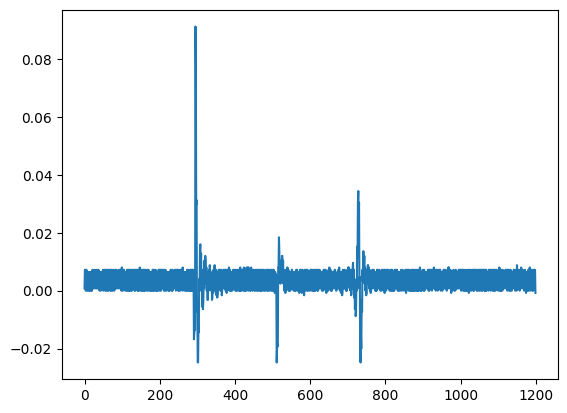

In [21]:
plt.plot(lines)
print(max(lines[600:]))
print("tau1: ", (lines.index(max(lines[400:600]), 400) - lines.index(max(lines))) * 5e-03)
plt.show()

In [7]:
with open('tauvariation.csv', mode ='r') as file: # "ElsieWiddowsonFileC051.txt"
    lines2 = file.readlines()
    lines2 = lines2[2:]
    lines2 = [float(line.split(",")[2]) for line in lines2]

print(lines2)


[0.0064, 0.0, 0.0064, 0.0, 0.0064, 0.0, 0.0064, 0.0, 0.0, 0.0064, 0.0064, 0.0, 0.0064, 0.0, 0.0072, 0.0, 0.0008, 0.0064, 0.0008, 0.0064, 0.0008, 0.0064, 0.0, 0.0064, 0.0064, 0.0008, 0.0064, 0.0, 0.0008, 0.0064, 0.0064, 0.0, 0.0, 0.0064, 0.0, 0.0064, 0.0064, 0.0, 0.0056, 0.0, 0.0008, 0.0064, 0.0, 0.0056, 0.0, 0.0056, 0.0, 0.0064, 0.0, 0.0056, 0.0064, 0.0008, 0.0008, 0.0064, 0.0064, 0.0008, 0.0008, 0.0072, 0.0, 0.0064, 0.0064, 0.0008, 0.0008, 0.0064, 0.0072, 0.0, 0.0064, 0.0008, 0.0064, 0.0, 0.0008, 0.0064, 0.0, 0.0064, 0.0, 0.0064, 0.0, 0.0064, 0.0008, 0.0064, 0.0056, 0.0, 0.0056, 0.0, 0.0064, 0.0, 0.0056, -0.0008, 0.0008, 0.0064, 0.0, 0.0056, 0.0, 0.0064, 0.0056, 0.0, 0.0064, 0.0008, 0.0008, 0.0064, 0.0064, 0.0008, 0.0008, 0.0064, 0.0008, 0.0064, 0.0064, 0.0, 0.0, 0.0056, 0.0064, 0.0, 0.0064, 0.0, 0.0008, 0.0064, 0.0008, 0.0064, 0.0064, 0.0, 0.0008, 0.0064, 0.0064, 0.0, 0.0064, 0.0, 0.0, 0.0064, 0.0064, 0.0, 0.0064, 0.0, 0.0, 0.0064, 0.0064, 0.0, 0.0064, 0.0, 0.0072, 0.0, 0.0, 0.0064, 

0.0144
tau2 2.21


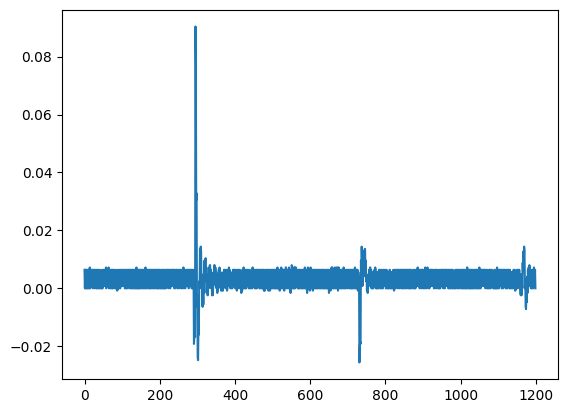

In [20]:
plt.plot(lines2)
print(max(lines2[1000:]))
print("tau2", (lines2.index(max(lines2[600:800]), 600, 800) - lines2.index(max(lines2))) * 5e-03)
plt.show()

In [3]:
# the big memory thing turned out to be useless, but here's the code for reading it
# reuse for all of the fe data

pm_lines = []
bigi = 2
bigj = 8
for i in range(1, 12, 2):
    thingy = []
    for j in range(2, 6):
        with open(f'fe/{i}t{j}.csv', mode ='r') as file: # "ElsieWiddowsonFileC051.txt"
            lines = file.readlines()
            lines = lines[2:]
            lines = [float(line.split(",")[1]) for line in lines]
            lines = np.array(lines) + -0.028800 # y-offset denoted by oscilloscope params
            thingy += [(j, lines)]

    pm_lines += [thingy]

# pm_lines = np.array(pm_lines)

# these tau=3 don't exist, they're just duplicated tau=2 data from the sample
pm_lines[2].pop(1)
pm_lines[4].pop(1)

for sample in pm_lines:
    for j, lines in sample:
        avg = np.sum(lines[-100:]) / 100
        lines -= avg

# print(len(pm_lines))
# for sample in pm_lines:
#     for j, lines in sample:
#         plt.plot(lines)
#         plt.show() 

ml_of_0166 = np.array([5, 1.65, 0.5, 0.165, 0.05])
mol = ml_of_0166 * 0.166
new_M = mol / (5)
ml_of_000166 = 1.65
mol_for_this = ml_of_000166 * 0.00166
new_M = np.append(new_M, mol_for_this / (5))
print(new_M)

[0.166     0.05478   0.0166    0.005478  0.00166   0.0005478]


In [4]:
maxes = []
errors = []
counterfactuals = []
# since the timestep between measurements is 2e-3s, tau=1 should be 50 sample sizes
offset = np.argmax(pm_lines[0][0][1])
print(offset * 2e-3)

for sample in pm_lines:
    to_fit_x = []
    to_fit_y = []
    error_x = []
    error_y = []
    cx = []
    cy = []
    for tau, lines in sample:
        bar = offset + tau * 50 * 2 - 50
        x = bar + np.argmax(lines[bar:])
        counterfactual_x = bar + np.argmax(- lines[bar:])
        y = np.max(lines[bar:])
        counterfactual_y = np.max(- lines[bar:])
        to_fit_x += [x]
        to_fit_y += [y]
        cx += [counterfactual_x]
        cy += [counterfactual_y]
        error_x += [abs(x - counterfactual_x)]
        error_y += [abs(y - counterfactual_y)]

        # print(x, counterfactual_x)
        # print(y, counterfactual_y)
        # to_fit += [(x * 2e-3, y * 0.02)] # these are in (seconds, volts)

    maxes += [np.array([to_fit_x, to_fit_y])]
    errors += [np.array([error_x, error_y])]
    counterfactuals += [np.array([cx, cy])]

print(maxes)
print(errors[2:])

0.156
[array([[2.8900e+02, 5.8100e+02, 4.5800e+02, 1.0450e+03],
       [9.2800e-03, 8.8080e-03, 7.6320e-03, 1.0056e-02]]), array([[2.580e+02, 1.094e+03, 6.990e+02, 1.083e+03],
       [8.448e-03, 8.328e-03, 8.576e-03, 7.216e-03]]), array([[2.5800e+02, 4.5800e+02, 5.5700e+02],
       [3.8640e-02, 1.6424e-02, 1.1560e-02]]), array([[2.5800e+02, 3.5800e+02, 4.5800e+02, 5.5700e+02],
       [6.9192e-02, 6.0408e-02, 5.0424e-02, 4.2976e-02]]), array([[2.5800e+02, 4.5800e+02, 5.5800e+02],
       [7.7416e-02, 7.1376e-02, 6.7904e-02]]), array([[2.5900e+02, 3.5800e+02, 4.5900e+02, 5.5800e+02],
       [6.3024e-02, 5.7912e-02, 5.6544e-02, 5.5936e-02]])]
[array([[7.000e+00, 5.000e+00, 8.000e+00],
       [2.720e-03, 2.352e-03, 1.680e-03]]), array([[7.0000e+00, 7.0000e+00, 6.0000e+00, 7.0000e+00],
       [1.0216e-02, 8.7840e-03, 8.7520e-03, 6.8480e-03]]), array([[7.      , 7.      , 7.      ],
       [0.011168, 0.010048, 0.009792]]), array([[6.000e+00, 7.000e+00, 6.000e+00, 7.000e+00],
       [2.752e-03

[0.00727634 0.13191093] [0.00014378 0.01210939]


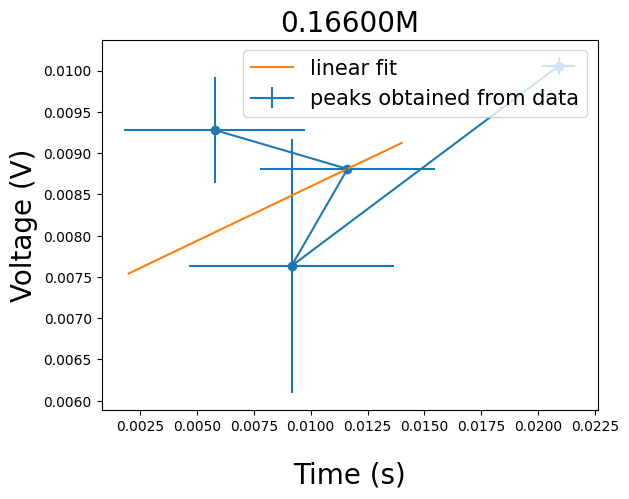

[ 0.00858507 -0.01340231] [0.00171288 0.07893125]


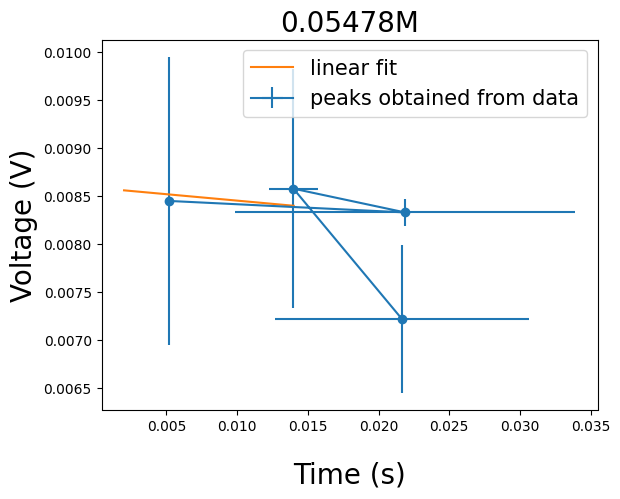

[ 0.06042401 -4.47776179] [0.00516179 0.53352897]


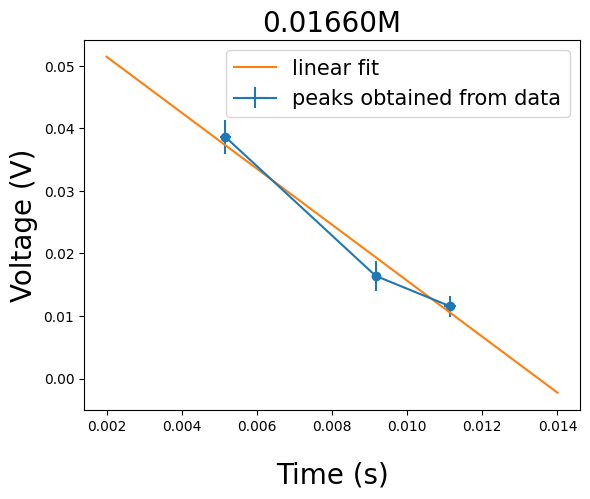

[ 0.09171122 -4.40495798] [0.01709471 1.88906742]


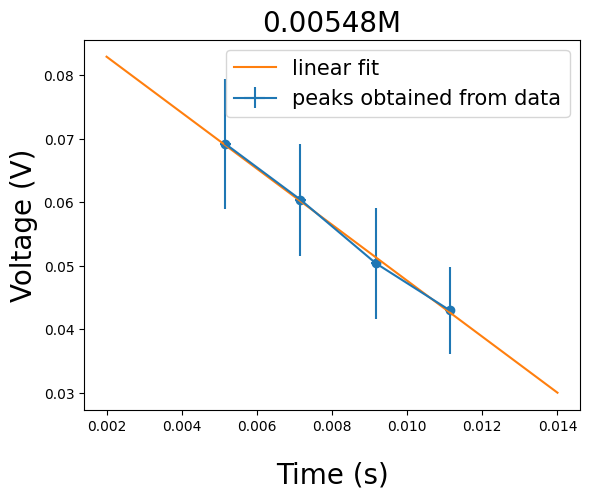

[ 0.08563911 -1.57820445] [0.0223436  2.45761482]


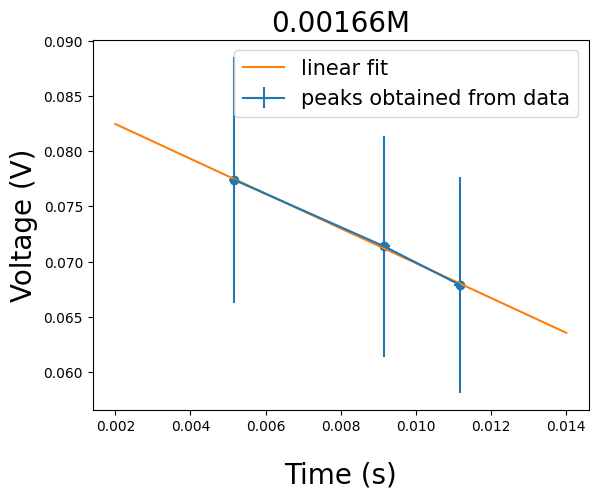

[ 0.0696133  -1.32687212] [0.0067934  0.94131449]


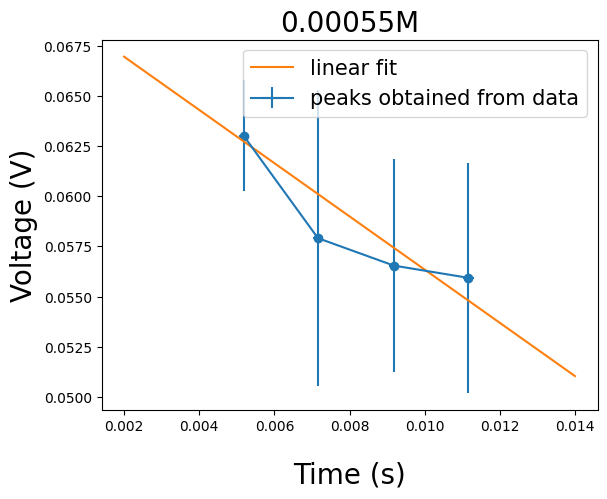

In [5]:
def exponential(x, a, b, c):
    return a * np.exp(b * x) + c

slopes = []
slope_errs = []

for ind, (sample, errs) in enumerate(zip(maxes, errors)):
    plt.errorbar(sample[0] * 2e-5, sample[1], yerr=errs[1], xerr=errs[0] * 2e-5, label="peaks obtained from data")
    plt.scatter(sample[0] * 2e-5, sample[1])
    p0 = [1, 0.1, 0]
    # popt, pcov = opt.curve_fit(exponential, sample[0] * 2e-5, sample[1], p0=p0, sigma=errs[1])
    # perr = np.sqrt(np.diag(pcov))
    popt, perr, chisq, yfit = fitlin(sample[0] * 2e-5, sample[1], errs[1])
    print(popt, perr)
    xlin = np.linspace(100, 700, 10000) * 2e-5
    # ylin = exponential(xlin, popt[0], popt[1], popt[2])
    ylin = popt[0] + popt[1] * xlin
    slopes += [popt[1]]
    slope_errs += [perr[1]]
    plt.plot(xlin, ylin, label="linear fit")
    plt.title(f'{new_M[ind]:.5f}M', fontsize=20)
    plt.xlabel(r'Time (s)', fontsize=20, labelpad=20)
    plt.ylabel(r'Voltage (V)', fontsize=20)
    # plt.legend(loc="upper right" if ind != 4 else "lower right",fontsize=15,ncol = 1)
    plt.legend(loc="upper right",fontsize=15,ncol = 1)
    plt.show() 


/var/folders/62/x3ck94bx3vd6dfbs23ltb9dw0000gn/T/ipykernel_85095/3331444528.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right",fontsize=15,ncol = 1)


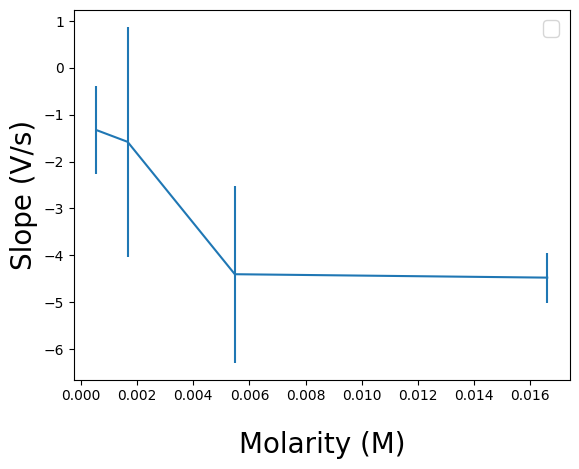

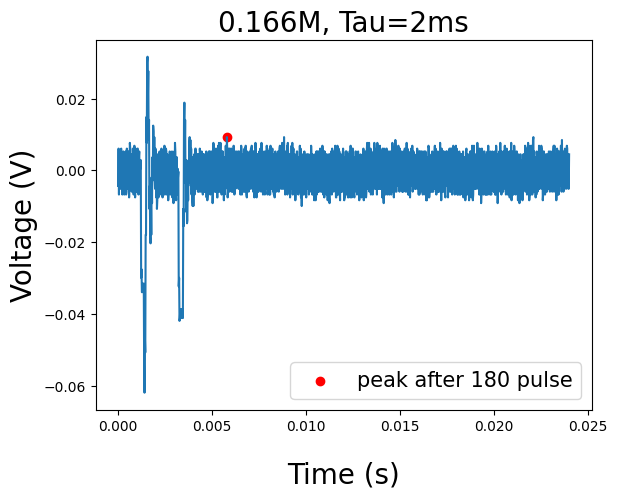

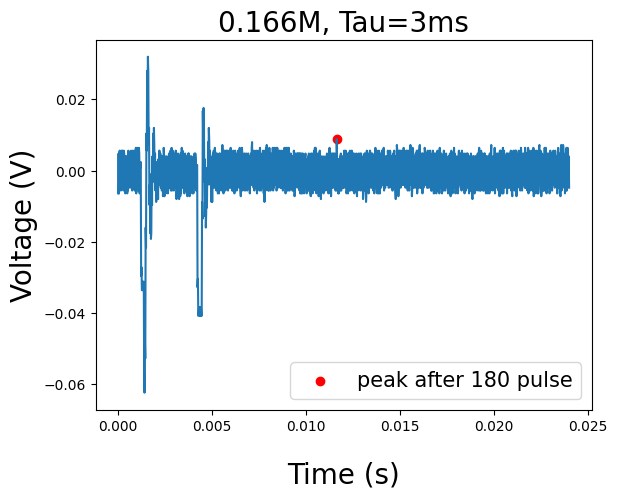

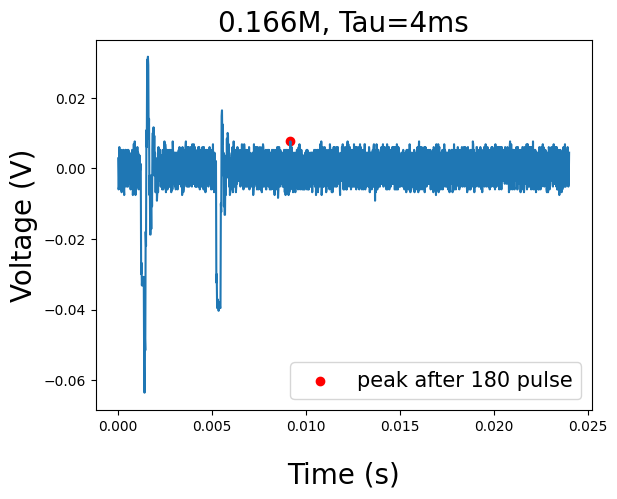

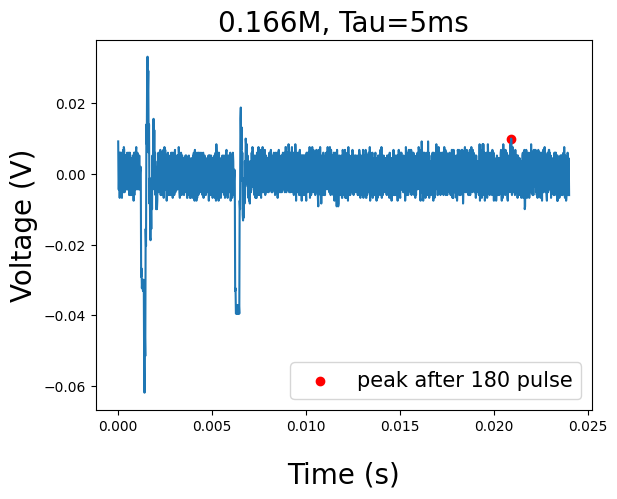

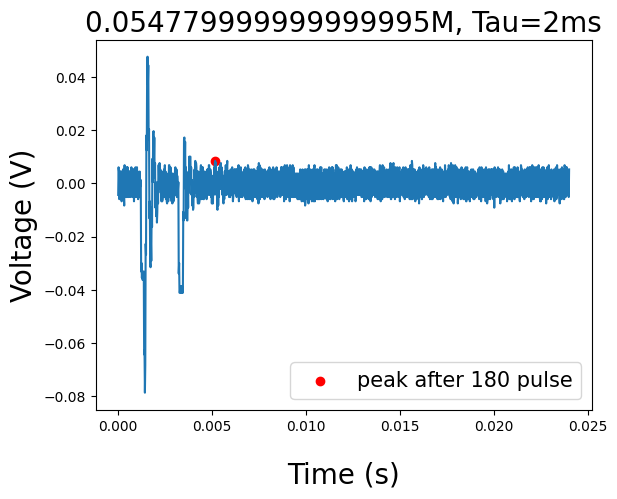

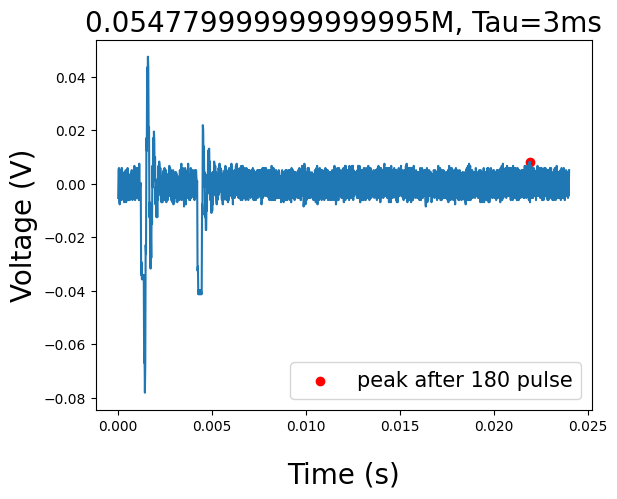

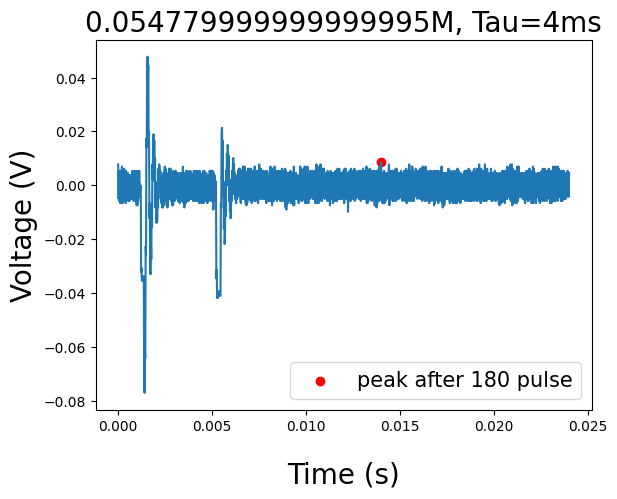

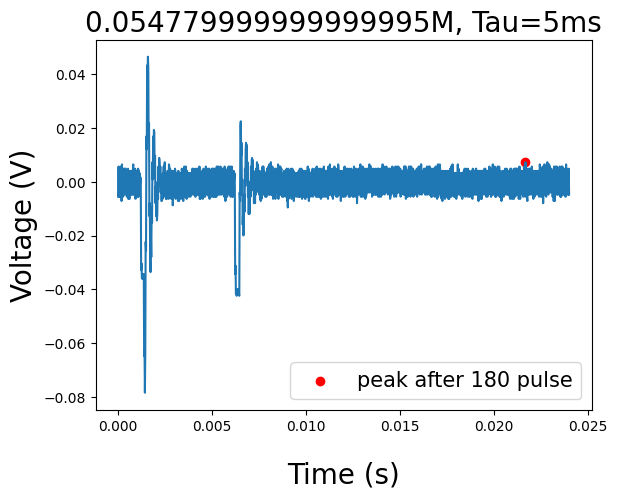

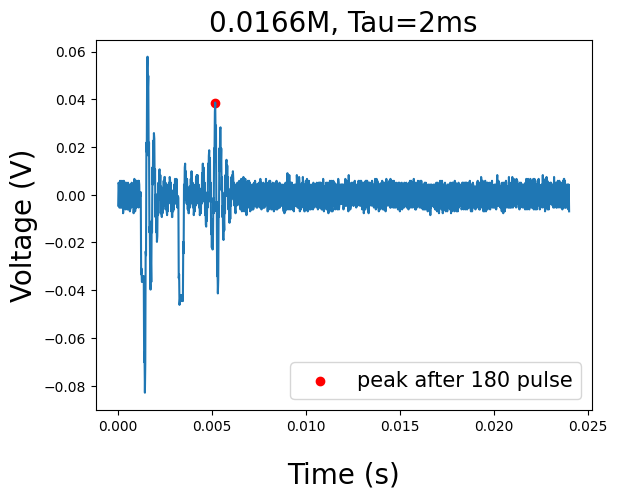

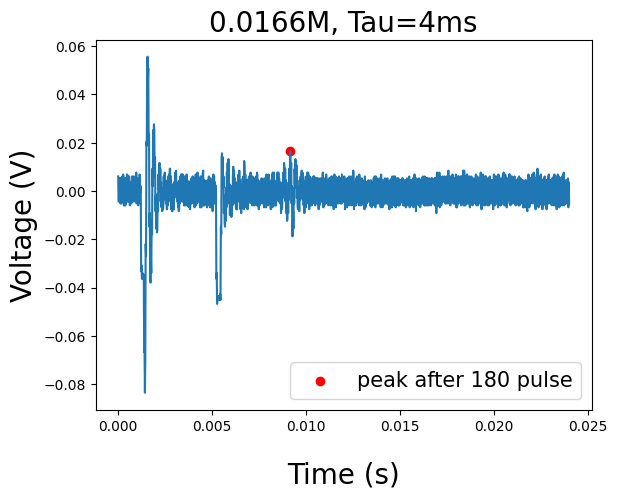

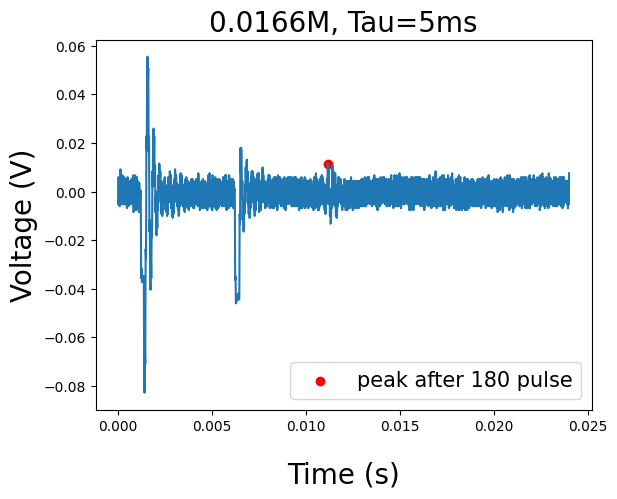

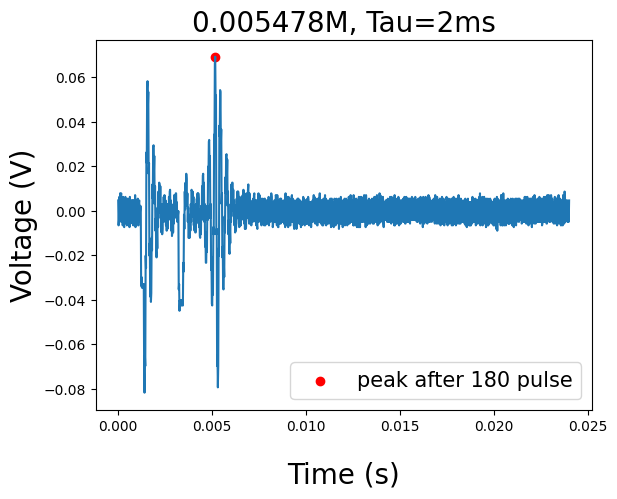

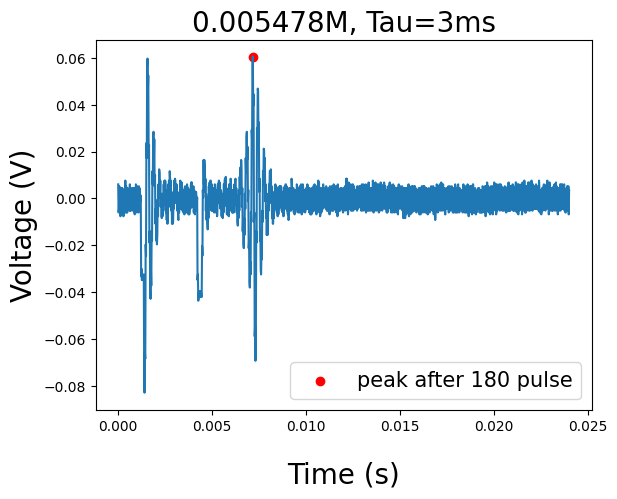

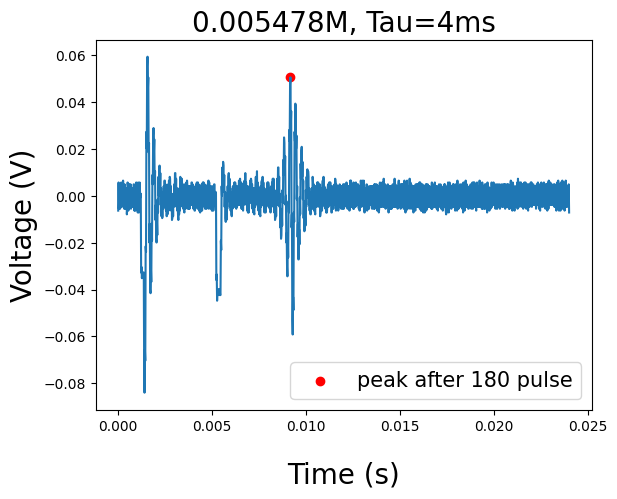

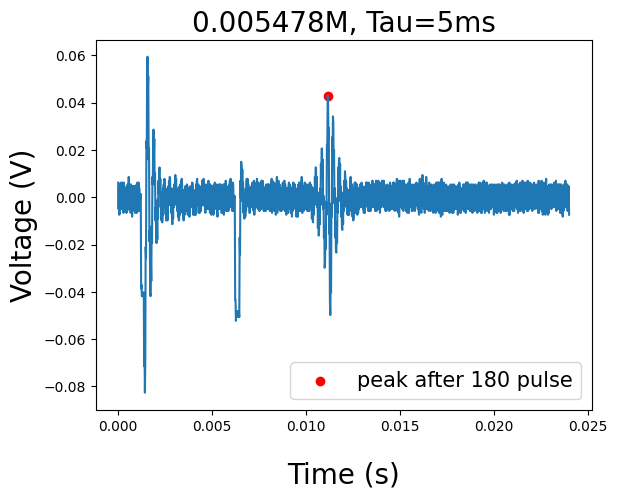

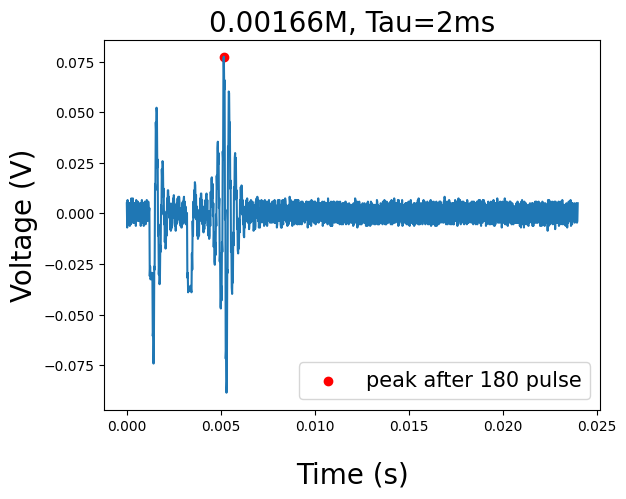

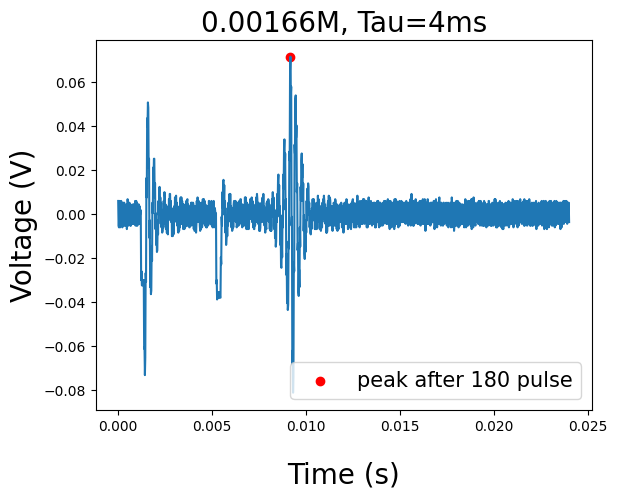

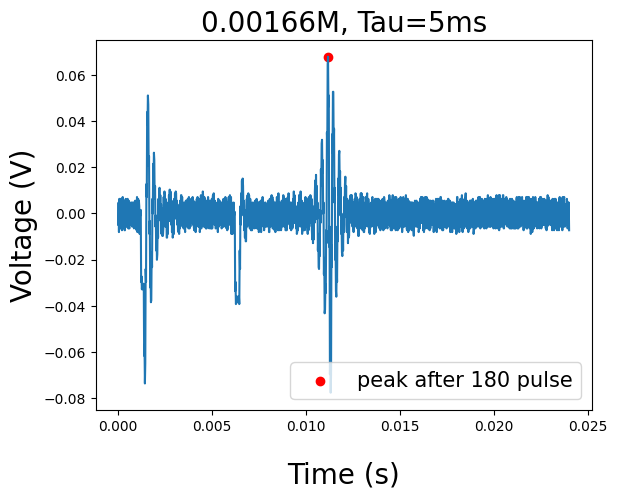

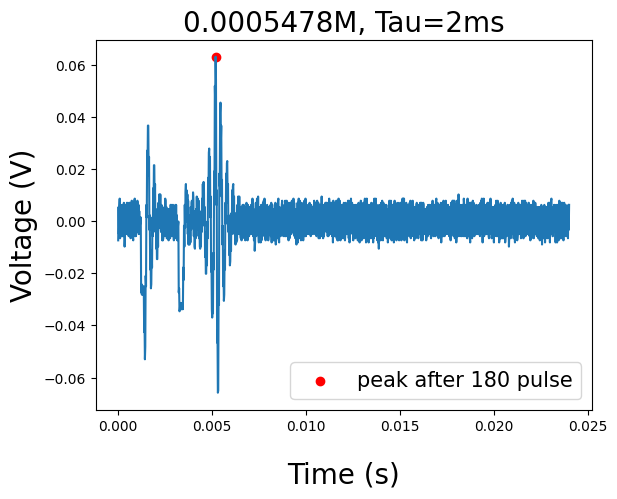

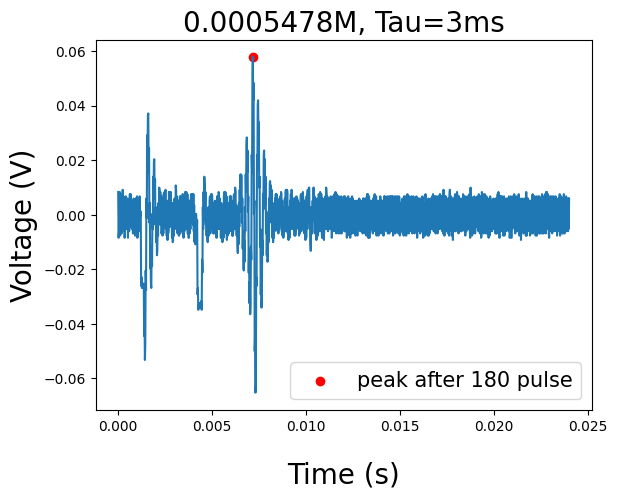

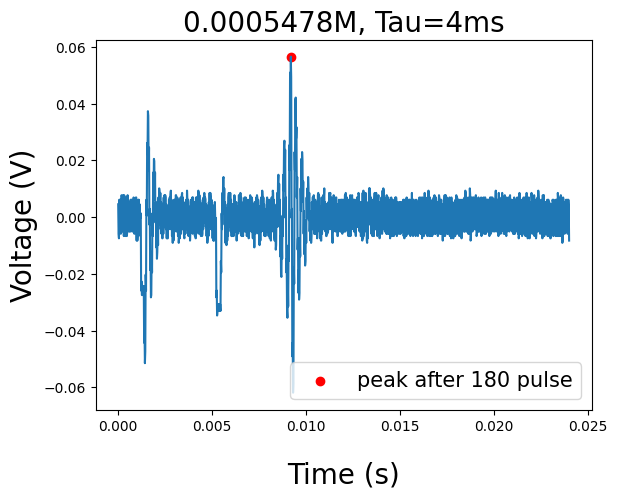

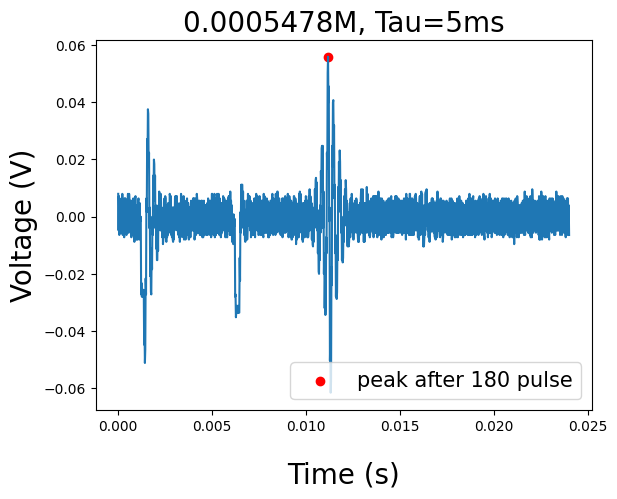

In [6]:
plt.errorbar(new_M[2:], slopes[2:], yerr=slope_errs[2:])
# plt.title(f'{new_M[ind]:.5f}M', fontsize=20)
plt.xlabel(r'Molarity (M)', fontsize=20, labelpad=20)
plt.ylabel(r'Slope (V/s)', fontsize=20)
# plt.legend(loc="upper right" if ind != 4 else "lower right",fontsize=15,ncol = 1)
plt.legend(loc="upper right",fontsize=15,ncol = 1)
plt.show()

for ind, (sample, ma) in enumerate(zip(pm_lines, maxes)):
    for index in range(len(sample)):
        plt.plot(np.array(range(len(sample[index][1])))*2e-5, sample[index][1])
        plt.scatter([ma[0][index]*2e-5],[ma[1][index]], color=(1,0,0), label="peak after 180 pulse")
        plt.title(f'{new_M[ind]}M, Tau={sample[index][0]}ms', fontsize=20)
        plt.xlabel(r'Time (s)', fontsize=20, labelpad=20)
        plt.ylabel(r'Voltage (V)', fontsize=20)
        plt.legend(loc="lower right" if ind != 4 else "lower right",fontsize=15,ncol = 1)
        plt.show() 